<a href="https://colab.research.google.com/github/younus8imran/MyProjects/blob/master/fashion_mnist_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Classification on FashionMnist dataset 

Let's import all the necessary libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D
from tensorflow.keras.datasets import fashion_mnist

We'll load the fashion-mnist dataset 

In [6]:
data = keras.datasets.fashion_mnist

Splitting the data into train and test set

In [7]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

Our dataset contains pixel values and the pixel intensities ranges from 0 to 255, let's scale it down in the range 0 to 1  by dividing it by 255 for the sake of computation

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Output classes of the fashion-mnist dataset

In [10]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']       

Now, let's define our model architecture

In [15]:
model = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
])

Have a look at the model architecture

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Compile the model, we'll use sparse_categorical_crossentropy and adam optimizer

In [16]:
model.compile(optimizer='adam', 
              loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])

Now, let's train the model on 5 epochs

In [17]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4955 - accuracy: 0.8258
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3735 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3336 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3111 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2934 - accuracy: 0.8913


Our model trained with 89.13%
accuracy, let's evaluate our model on test set to check the performance of the model on unseen data

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest Accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3438 - accuracy: 0.8725

Test Accuracy: 0.8725000023841858


The model performed 87.25% on test set.Let's predict.

In [22]:
predictions = model.predict(test_images)

array([1.2179012e-05, 9.4275329e-08, 1.8810084e-07, 3.2724426e-08,
       4.5789770e-07, 4.0587899e-03, 2.6902210e-06, 6.0489126e-02,
       3.0762942e-05, 9.3540573e-01], dtype=float32)

The model predicts a set of 10 probabilites(since we're using softmax), the highest of them is the desired prediction.

Since the predictions are in numbers, let's visualize them using matplotlib.

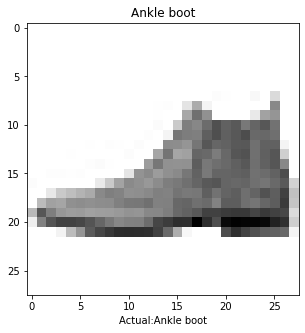

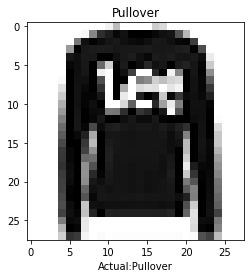

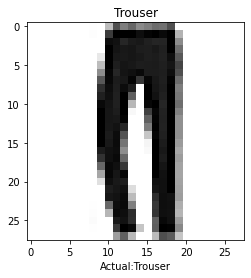

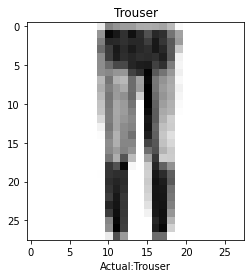

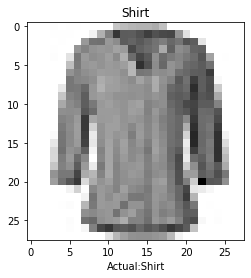

In [25]:
plt.figure(figsize=(5, 5))
for i in range(5):
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel("Actual:" + classes[test_labels[i]])
  plt.title(classes[np.argmax(predictions[i])])
  plt.show()

In [29]:
for i  in range(5):
  print("Actual--> " + classes[test_labels[i]], '',
                               "Predicted--> " + classes[np.argmax(predictions[i])])

Actual--> Ankle boot  Predicted--> Ankle boot
Actual--> Pullover  Predicted--> Pullover
Actual--> Trouser  Predicted--> Trouser
Actual--> Trouser  Predicted--> Trouser
Actual--> Shirt  Predicted--> Shirt
